# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
train_df= pd.read_csv("/content/drive/MyDrive/Group_project/final_project/Dataset/train.csv")
#test_df= pd.read_csv("/content/drive/MyDrive/Group_project/final_project/Dataset/test.csv")
#test_labels_df= pd.read_csv("/content/drive/MyDrive/Group_project/final_project/Dataset/sample_submission.csv")


In [6]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Functions

In [7]:
def clean_text(text):
    
   ## 1. Lowercase the text
    text = text.lower() 

  ## 2. Remove Punctuations
    text = text.translate(str.maketrans('', '', string.punctuation)) 
  
  ## 3. Tokenize all the words
    words = nltk.word_tokenize(text)

  ## 4. Remove stopwords and word digits
  #clean_text = " ".join([ w for w in words if w.isalnum() ])
    clean_text = " ".join([ w for w in words if w.isalnum() and (w not in stop_words)  ])
    clean_text = clean_text.replace("\t", ' ')
  
    return clean_text

In [8]:
##getting length of each question
def ques_len(train_df):
    q=train_df.split(" ")
    return len(q)

In [9]:
##getting the number of common words between the two questions
def word_common(train_df):
    q1=set(train_df['question1'].split(" "))
    q2=set(train_df['question2'].split(" "))
    return len(q1&q2)

In [10]:
##getting the difference of length between two words
def word_len_diff(train_df):
    q1=train_df['question1'].split(" ")
    q2=train_df['question2'].split(" ")
    return abs(len(q1)-len(q2))


# Data Exploration

In [11]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


**Checking for null values**

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Reviewing the number of records in each column, there are some questions that have null values

In [13]:
np.where(pd.isnull(train_df['question2']))

(array([105780, 201841]),)

In [14]:
np.where(pd.isnull(train_df['question1']))

(array([363362]),)

In [15]:
train_df.iloc[105780,:]

id                                      105780
qid1                                    174363
qid2                                    174364
question1       How can I develop android app?
question2                                  NaN
is_duplicate                                 0
Name: 105780, dtype: object

In [16]:
train_df.iloc[201841,:]

id                                        201841
qid1                                      303951
qid2                                      174364
question1       How can I create an Android app?
question2                                    NaN
is_duplicate                                   0
Name: 201841, dtype: object

In [17]:
train_df.iloc[363362,:]

id                                                         363362
qid1                                                       493340
qid2                                                       493341
question1                                                     NaN
question2       My Chinese name is Haichao Yu. What English na...
is_duplicate                                                    0
Name: 363362, dtype: object

**Checking the number of unique question in the Dataset**

In [18]:
print("Number of unique Questions in Column 1 :")
q1_unique=train_df['question1'].nunique()
q1_unique

Number of unique Questions in Column 1 :


290456

In [19]:
print("Number of unique Questions in Column 2 :")
q2_unique=train_df['question2'].nunique()
q2_unique

Number of unique Questions in Column 2 :


299174

In [20]:
print("Number of unique Questions in All the dataset :")
all_questions= pd.concat([train_df['question1'] , train_df['question2']],axis=0, ignore_index=True)
all_unique=all_questions.nunique()
all_unique

Number of unique Questions in All the dataset :


537360

In [21]:
train_df.shape[0]

404290

Percentage of unique Questions:  66.46


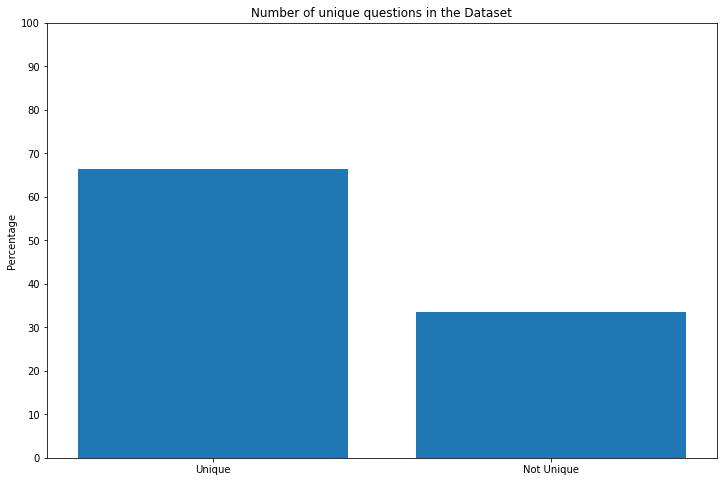

In [22]:
###Bar plot for the number of unique questions in the dataset 

##Calculating Percentages
uniq_per=(all_unique/all_questions.shape[0])*100
not_per=((all_questions.shape[0]-all_unique)/all_questions.shape[0])*100
print("Percentage of unique Questions: ",np.round(uniq_per,2))

###Bar plot
fig = plt.subplots(figsize =(12, 8));
plt.bar(["Unique","Not Unique"], [uniq_per,not_per]);
plt.title("Number of unique questions in the Dataset");
plt.ylabel("Percentage");
plt.yticks(np.arange(0,110,10));

We can see that the number of unique questions in the dataset is about **66**% of the dataset and the rest is just a repeated questions

**Checking the labels Precentages**

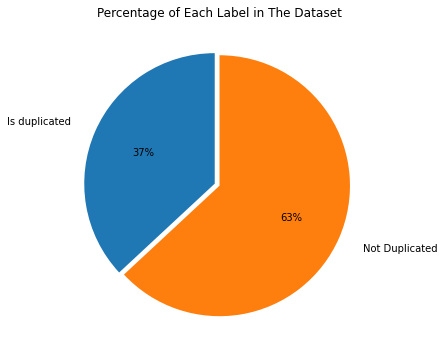

In [23]:
##plotting a pie chart for the labels

##Calculating Percentages
label_1 = (((train_df['is_duplicate']==1).sum())/train_df.shape[0])*100
label_2 = ((train_df['is_duplicate']==0).sum()/train_df.shape[0])*100


##Pie Chart
fig = plt.subplots(figsize =(10, 6));
plt.pie([label_1,label_2],labels=["Is duplicated", "Not Duplicated"],startangle=90,autopct='%1.0f%%', labeldistance=1.2,explode=[0.04,0]);
plt.title("Percentage of Each Label in The Dataset");


**More of Exploration on the labeling Technique**

In [24]:
##Checking if there is a cases where q1= q2
df_temp=train_df[train_df.question1==train_df.question2]
print(df_temp.shape)
print(df_temp['is_duplicate'].shape)

(0, 6)
(0,)


In [25]:
##Cleaning Text
##Removing Rows with NaN questions
df_temp2=train_df.drop(index= [201841,105780,363362])
df_temp2['question1']=[clean_text(x) for x in df_temp2['question1']]
df_temp2['question2']=[clean_text(x) for x in df_temp2['question2']]

In [26]:
##Checking if there is a cases where q1= q2 after cleaning
df_temp2=df_temp2[df_temp2.question1==df_temp2.question2]
print(df_temp2.shape)
print(df_temp2[df_temp2['is_duplicate']==0].shape)
df_temp2[df_temp2['is_duplicate']==0]

(16368, 6)
(3748, 6)


,id,qid1,qid2,question1,question2,is_duplicate
41,41,83,84,expect cognizant confirmation mail,expect cognizant confirmation mail,0
111,111,223,224,usa powerful country world,usa powerful country world,0
222,222,445,446,find job japan,find job japan,0
277,277,554,555,people die,people die,0
298,298,596,597,online platforms post ads beer money opportunity,online platforms post ads beer money opportunity,0
...,...,...,...,...,...,...
404087,404087,537723,537724,become mortgage broker,become mortgage broker,0
404160,404160,314605,8991,happy,happy,0
404175,404175,537822,537823,live alone college,live alone college,0
404270,404270,537912,35364,difference,difference,0


From the above results, we can see that after the cleaning process, there are 16368 records that have Q1=Q2 and there are 3748 of them are labeled as different questions, so we need more exploration of these questions

In [27]:
##looking deeper into these questions
train_df.iloc[41,:]

id                                                             41
qid1                                                           83
qid2                                                           84
question1       When can I expect my Cognizant confirmation mail?
question2          When can I expect Cognizant confirmation mail?
is_duplicate                                                    0
Name: 41, dtype: object

In [28]:
train_df.iloc[111,:].head()

id                                                         111
qid1                                                       223
qid2                                                       224
question1       Is USA the most powerful country of the world?
question2    Why is the USA the most powerful country of th...
Name: 111, dtype: object

In [29]:
train_df.iloc[222,:]

id                                             222
qid1                                           445
qid2                                           446
question1             How can I find job in Japan?
question2       How can I find an IT job in Japan?
is_duplicate                                     0
Name: 222, dtype: object

In [30]:
train_df.iloc[277,:]

id                                  277
qid1                                554
qid2                                555
question1       How do most people die?
question2            How do people die?
is_duplicate                          0
Name: 277, dtype: object

In [31]:
##Taking a look into the real questions before cleaning
train_df.iloc[df_temp2[df_temp2['is_duplicate']==0].index,:]

,id,qid1,qid2,question1,question2,is_duplicate
41,41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0
111,111,223,224,Is USA the most powerful country of the world?,Why is the USA the most powerful country of th...,0
222,222,445,446,How can I find job in Japan?,How can I find an IT job in Japan?,0
277,277,554,555,How do most people die?,How do people die?,0
298,298,596,597,On what online platforms can I post ads for be...,What online platforms can I post ads for beer ...,0
...,...,...,...,...,...,...
404087,404087,537723,537724,How do I become a mortgage broker?,Should I become a mortgage broker?,0
404160,404160,314605,8991,How can you not be happy?,How can I be happy?,0
404175,404175,537822,537823,How can I live alone in college?,Should I live alone while in college?,0
404270,404270,537912,35364,What is the difference between who and how?,"What is the difference between ""&"" and ""and""?",0


**Checking the length of each question**

In [32]:
##getting length of each question
##Dropping empty rows first
df_temp3=train_df.drop(index= [201841,105780,363362])

df_temp3['quest1_len']=df_temp3['question1'].apply(ques_len)
df_temp3['quest2_len']=df_temp3['question2'].apply(ques_len)

In [33]:
(df_temp3['quest1_len'] < 2).sum()

66

In [34]:
df_temp3[df_temp3['quest1_len'] < 2]

,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len
3306,3306,6553,6554,.,Why is Cornell's endowment the lowest in the I...,0,1,10
13016,13016,25026,25027,?,Why should one not work at Google?,0,1,7
17682,17682,33561,33562,deleted,Which website will be suitable for downloading...,0,1,10
20794,20794,39204,39205,?,What is the Gmail tech support help phone number?,0,1,9
23305,23305,33561,43661,deleted,Which are some best websites for downloading n...,0,1,10
...,...,...,...,...,...,...,...,...
356434,356434,147899,485756,Deleted.,Do gay men find red headed men more attractive...,0,1,15
357127,357127,486520,146954,H,Should I forgive the cheater?,0,1,5
365317,365317,33561,365465,deleted,From which site I can download GTA 4 game?,0,1,9
381124,381124,512812,512813,no,I have a BS and MPH and hate my job. I found t...,0,1,27


In [35]:
(df_temp3['quest2_len'] < 2).sum()

22

In [36]:
df_temp3[df_temp3['quest2_len'] < 2]

,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len
20072,20072,37898,37899,How could I solve this?,…………..,0,5,1
46596,46596,83328,83329,How To Edit DNA?,What?,0,4,1
47056,47056,84067,84068,Is there anywhere in the world offering pain m...,?,0,19,1
51909,51909,92003,83329,What should yellow taxis do to face competitio...,What?,0,12,1
74304,74304,127360,127361,Is there any chances for hailstones tomorrow?,parisflatlist,0,7,1
109009,109009,178981,178982,How do I make a box that I can put my phone in...,Hh,0,25,1
130637,130637,209606,209607,Does the Quran surah 23: 5-6 prove that Allah ...,Does?,0,16,1
144506,144506,228687,228688,How beautiful do you think you are?,Delete,0,7,1
145000,145000,229359,229360,Me and my girlfriend wish to go out and do 'st...,Deleted.,0,28,1
175282,175282,269923,44699,Hh,HH,1,2,1


**There are multiple questions that there length is less than 3 words, thoses must be meaningless sentences**

# Data & Text cleaning

In [37]:
##Removing Rows with NaN questions
train_df.drop(index= [201841,105780,363362],inplace=True)

In [38]:
##Getting length of each question
train_df['quest1_len']=train_df['question1'].apply(ques_len)
train_df['quest2_len']=train_df['question2'].apply(ques_len)

In [39]:
###Removing Rows with question length is less than 2
train_df=train_df[train_df['quest1_len'] >1 ]

In [40]:
###Removing Rows with question length is less than 2
train_df=train_df[train_df['quest2_len'] >1 ]

In [41]:
##Cleaning Text
train_df['question1']=train_df['question1'].apply(clean_text)
train_df['question2']=train_df['question2'].apply(clean_text)

In [42]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,14,12
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,8,13
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,14,10
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0,11,9
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,13,7


# Text Features

In [43]:
###Getting the number of common words between the two questions
train_df['common_word_count']=train_df.apply( word_common,axis=1)

In [44]:
##Getting the difference between the number of words in the two questions
train_df['word_len_diff']=train_df.apply(word_len_diff,axis=1)

In [45]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len,common_word_count,word_len_diff
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,14,12,5,1
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,8,13,2,5
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,14,10,2,1
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0,11,9,0,2
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,13,7,2,5


In [46]:
train_df = train_df[['id','qid1','qid2', 'question1', 'question2', 'quest1_len','quest2_len','common_word_count','word_len_diff','is_duplicate']]

In [47]:
train_df.head()

,id,qid1,qid2,question1,question2,quest1_len,quest2_len,common_word_count,word_len_diff,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,14,12,5,1,0
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,8,13,2,5,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,14,10,2,1,0
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,11,9,0,2,0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,13,7,2,5,0


### LDA Model

In [48]:
!pip install gensim

In [49]:
import re
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
words = re.compile(r"\w+",re.I)
stopword = stopwords.words('english')

In [50]:
def tokenize(df):
    q1 = []
    q2 = []
    for q in df.question1.tolist():
        q1.append([(i.lower()) for i in words.findall(q) if i not in stopword])
    for q in df.question2.tolist():
        q2.append([(i.lower()) for i in words.findall(q) if i not in stopword])
    df["q1_tokens"] = q1
    df["q2_tokens"] = q2
    return df

def train_dictionary(df):
    q_tokens = df.q1_tokens.tolist() + df.q2_tokens.tolist()
    dictionary = corpora.Dictionary(q_tokens)
    return dictionary
    


In [51]:
LDA_df = tokenize(train_df)
LDA_dictionary = train_dictionary(train_df)

In [52]:
def get_vectors(df, dictionary):
    
    question1_vec = [dictionary.doc2bow(text) for text in df.q1_tokens.tolist()]
    question2_vec = [dictionary.doc2bow(text) for text in df.q2_tokens.tolist()]
    question1_csc = gensim.matutils.corpus2csc(question1_vec, num_terms=len(dictionary.token2id))
    question2_csc = gensim.matutils.corpus2csc(question2_vec, num_terms=len(dictionary.token2id))
    return question1_csc.transpose(),question2_csc.transpose()


In [53]:
q1_vectors, q2_vectors = get_vectors(LDA_df,LDA_dictionary)

In [54]:
LDA_df.head(3)

,id,qid1,qid2,question1,question2,quest1_len,quest2_len,common_word_count,word_len_diff,is_duplicate,q1_tokens,q2_tokens
0,0,1,2,step step guide invest share market india,step step guide invest share market,14,12,5,1,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,8,13,2,5,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,14,10,2,1,0,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"


In [55]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics.pairwise import manhattan_distances as md
from sklearn.metrics.pairwise import euclidean_distances as ed
from sklearn.neighbors import DistanceMetric

minkowski_distance = DistanceMetric.get_metric('minkowski')

def get_similarity_values(q1_vector, q2_vector):
    cosine_similarty = []
    manhattan_distance = []
    eucledian_distance = []
    minkowsk_distance = []
    
    for i,j in zip(q1_vectors, q2_vectors):
        sim = cs(i,j)
        cosine_similarty.append(sim[0][0])
        sim = md(i,j)
        manhattan_distance.append(sim[0][0])
        sim = ed(i,j)
        eucledian_distance.append(sim[0][0])
        x = i.toarray()
        y = j.toarray()
      
            
        sim = minkowski_distance.pairwise(x,y)
        minkowsk_distance.append(sim[0][0])
    
    return cosine_similarty, manhattan_distance, eucledian_distance, minkowsk_distance    

cosine_sim, manhattan_dis, eucledian_dis, minkowsk_dis = get_similarity_values(q1_vectors, q2_vectors)

train_df["cosine"] = cosine_sim
train_df["manhattan"] = manhattan_dis
train_df["minkowsk"] = minkowsk_dis

print(train_df.head())

   id  qid1  qid2  ...    cosine manhattan  minkowsk
0   0     1     2  ...  0.942809       1.0  1.000000
1   1     3     4  ...  0.615457       7.0  2.645751
2   2     5     6  ...  0.365148       7.0  2.645751
3   3     7     8  ...  0.000000       8.0  2.828427
4   4     9    10  ...  0.282843      11.0  3.316625

[5 rows x 15 columns]


In [56]:
X_train, X_test = train_test_split(train_df, test_size=0.2, random_state=0)
ytrain = X_train["is_duplicate"]
ytest = X_test["is_duplicate"]
#print(df_train.head())
xtrain = X_train.loc[:,'cosine':]
xtest = X_test.loc[:,'cosine':]

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_normal=LogisticRegression()
lr_normal.fit(xtrain,ytrain)
Ypred_lr_normal_train=lr_normal.predict(xtrain)
Ypred_lr_normal_test=lr_normal.predict(xtest)


In [66]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
text = " Logistic Regression"
print(text, " Train Accuracy : ", accuracy_score(ytrain,Ypred_lr_normal_train)*100)
print(text, " Test Accuracy : ", accuracy_score(ytest,Ypred_lr_normal_test)*100)
print("\n\t\tTEST DATA METRICS")
print(text, " Confusion Matrix: ",confusion_matrix(ytest, Ypred_lr_normal_test))
print(text, " Report : ")
print(classification_report(ytest,Ypred_lr_normal_test))

 Logistic Regression  Train Accuracy :  66.40050222817364
 Logistic Regression  Test Accuracy :  66.44482929242949

		TEST DATA METRICS
 Logistic Regression  Confusion Matrix:  [[37891 13114]
 [14012 15823]]
 Logistic Regression  Report : 
              precision    recall  f1-score   support

           0       0.73      0.74      0.74     51005
           1       0.55      0.53      0.54     29835

    accuracy                           0.66     80840
   macro avg       0.64      0.64      0.64     80840
weighted avg       0.66      0.66      0.66     80840



In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
lda=LDA(n_components=1)
X_train_lda=lda.fit_transform(xtrain,ytrain)
X_test_lda = lda.fit_transform(xtest,ytest)

In [68]:
lr=LogisticRegression()
lr.fit(X_train_lda,ytrain)
Ypred_lr_train=lr.predict(X_train_lda)
Ypred_lr_test=lr.predict(X_test_lda)


In [70]:
text_1 = "Logistic Regression built on LDA"
print(text_1, " Train Accuracy : ", accuracy_score(ytrain,Ypred_lr_train)*100)
print(text_1, " Test Accuracy : ", accuracy_score(ytest,Ypred_lr_test)*100)
print("\n\t\tTEST DATA METRICS")
print(text_1, " Confusion Matrix: ",confusion_matrix(ytest, Ypred_lr_test))
print(text_1, " Report : ")
print(classification_report(ytest,Ypred_lr_test))


Logistic Regression built on LDA  Train Accuracy :  65.77952059475692
Logistic Regression built on LDA  Test Accuracy :  65.7644730331519

		TEST DATA METRICS
Logistic Regression built on LDA  Confusion Matrix:  [[39193 11812]
 [15864 13971]]
Logistic Regression built on LDA  Report : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     51005
           1       0.54      0.47      0.50     29835

    accuracy                           0.66     80840
   macro avg       0.63      0.62      0.62     80840
weighted avg       0.65      0.66      0.65     80840

